In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Loading the csv file

In [2]:
file = ('insurance.csv')
df = pd.read_csv(file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Cleaning

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

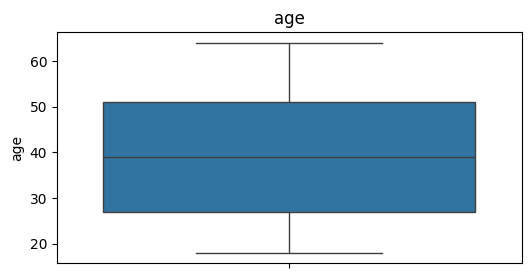

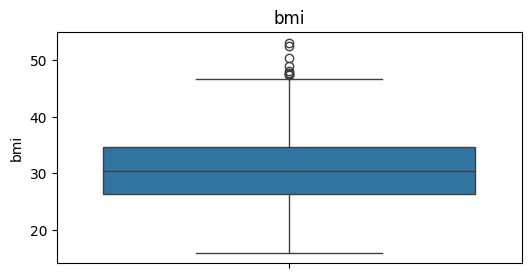

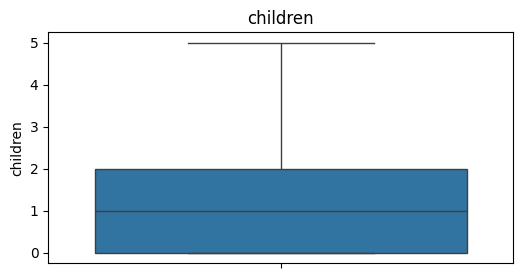

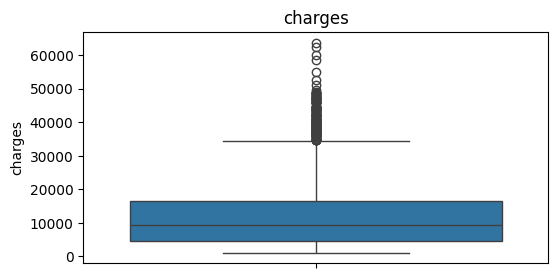

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df[col])
    plt.title(f"{col}")
    plt.show()

As shown here in above boxplots there is obvoisely outliers in bmi and charges someone would say i have to remove those raws because they would effect the model but unlike excpected it actullay would decrease the accuracy of our model because i might remove and hide some relationship for the model and also the number of samples are low.so i will keep them

# Univariate Analysis

<h2> Numerical Features

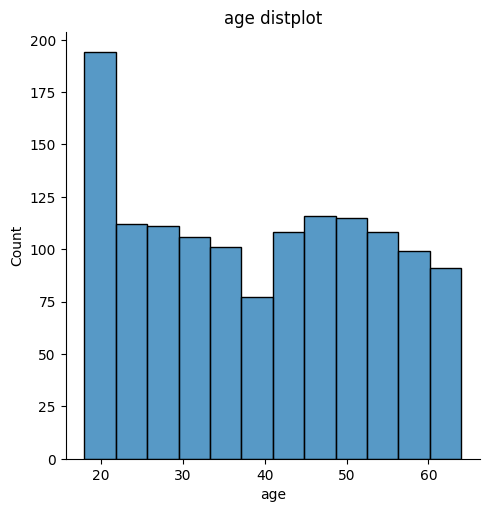

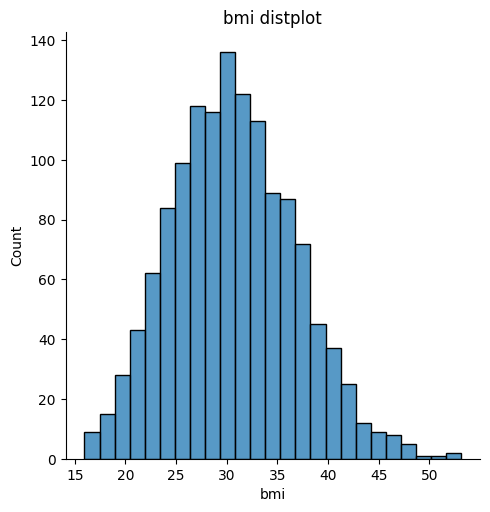

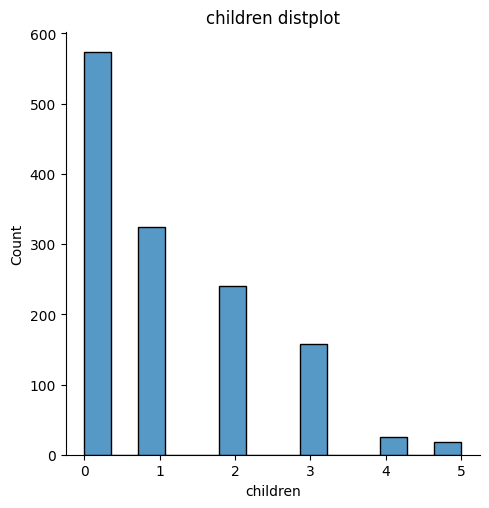

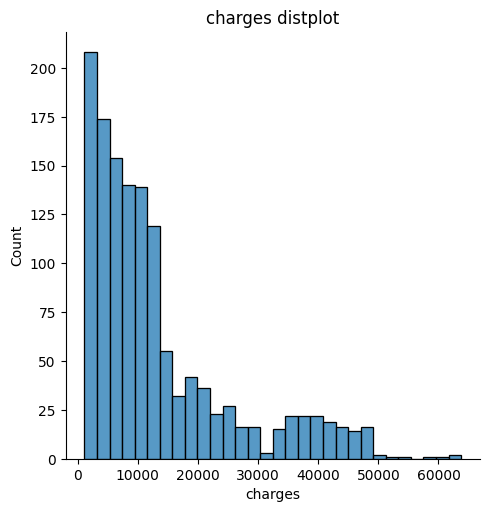

In [8]:
for col in numerical_cols :
    sns.displot(df[col])
    plt.title(f"{col} distplot")
    plt.show()

# Observations
- The displot for age shows a roughly uniform distribution ranging from 18 to 64, with a mean of 39.21, indicating a balanced age spread across the dataset.
- The bmi displot exhibits a slightly right-skewed distribution with a mean of 30.66, ranging from 15.96 to 53.13, suggesting most individuals are near the average with some higher-end outliers.
- The children displot is skewed, with a concentration at 0-2 children and a rapid decline for 3-5, reflecting that most individuals have few or no children.
- The charges displot is highly right-skewed, with a mean of 13270.42 and a range from 1121.87 to 63770.43, indicating significant outliers and a long tail, likely due to high-cost cases.

<h2>Categorical Features

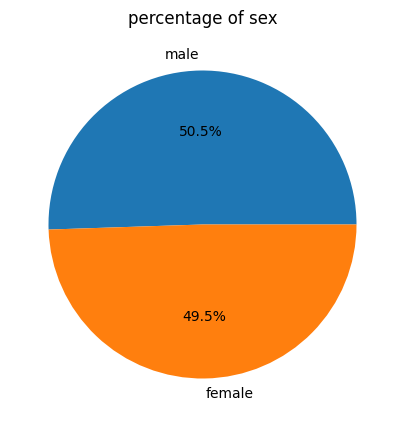

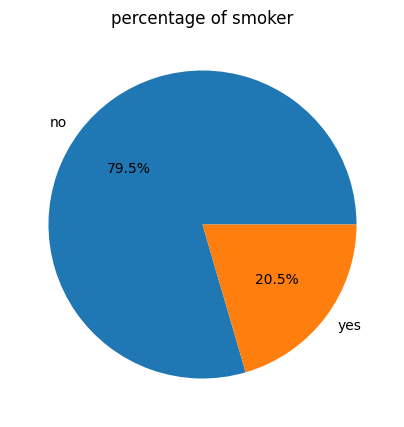

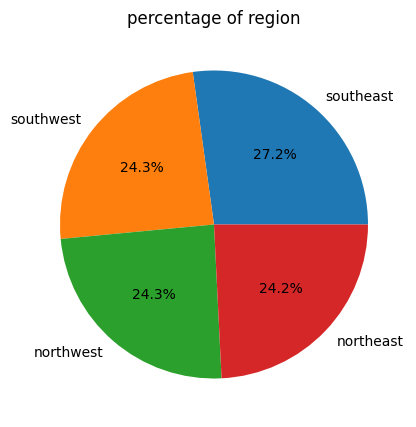

In [9]:
for col in categorical_cols :
    s = df[col].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {col}')
    plt.show()

# Observations
- The pie chart for sex shows an approximately equal distribution between male and female, suggesting no gender imbalance.
- The smoker pie chart indicates a small proportion of smokers compared to non-smokers, implying smoking is a minority trait with potential strong impact on charges.
- The region pie chart displays a nearly even split across northeast, southeast, southwest, and northwest, with minor variations, suggesting regional effects are not dominant.

# Bivariate Analysis

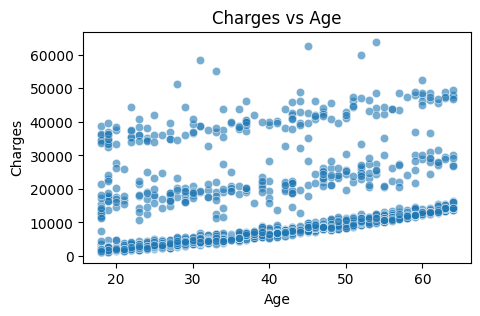

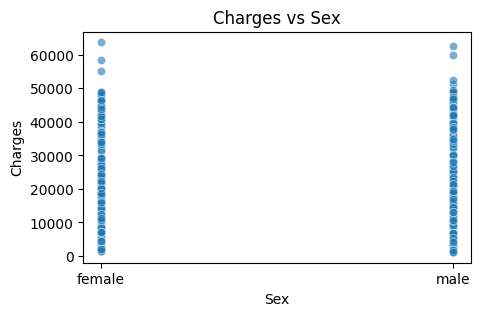

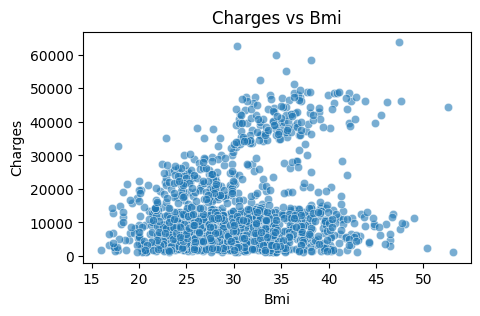

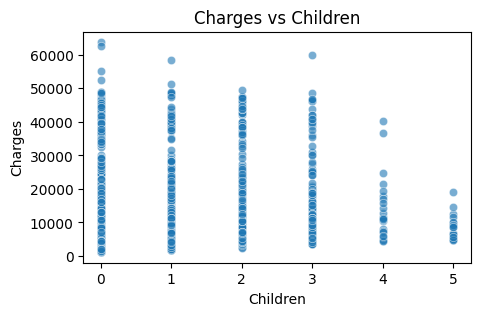

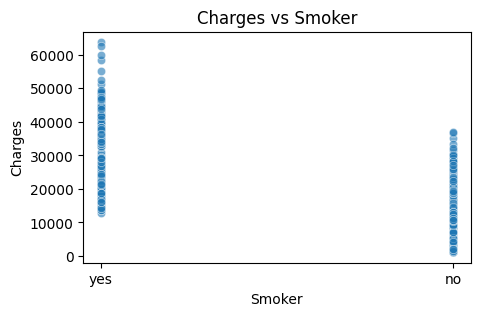

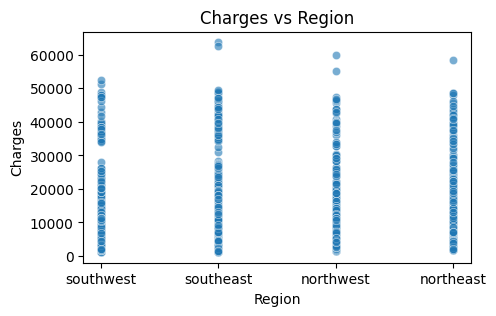

In [10]:
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

for col in columns:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df, x=col, y='charges', alpha=0.6)
    plt.title(f'Charges vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')

# Observations
- The scatter plot of age vs. charges shows a moderate positive trend, with charges increasing as age rises, particularly noticeable after age 40, indicating age as a key predictor.
- The bmi vs. charges scatter plot exhibits a weak positive correlation, with a slight upward trend, and some clustering of higher charges at elevated BMI levels, suggesting a minor influence.
- The children vs. charges scatter plot displays no clear trend, with charges scattered across all levels of children, reinforcing the weak correlation observed in the correlation matrix.
- The smoker vs. charges scatter plot shows a stark separation, with smokers having significantly higher charges (often exceeding 20,000), underscoring smoker as the strongest predictor.

# Encoding categorical features

In [11]:
dummies = pd.get_dummies(df[['sex',"smoker","region"]])
dummies.drop(labels=['sex_female', 'smoker_no'], axis=1,inplace=True)
df=pd.concat([df,dummies],axis=1)
df.drop(labels=['sex','smoker','region','region_northwest'],axis=1,inplace=True)
df.rename(columns={"sex_male":"sex","smoker_yes":"smoker"},inplace=True)
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,False,False,False
4,32,28.880,0,3866.85520,True,False,False,False,False


# Correlation Matrix

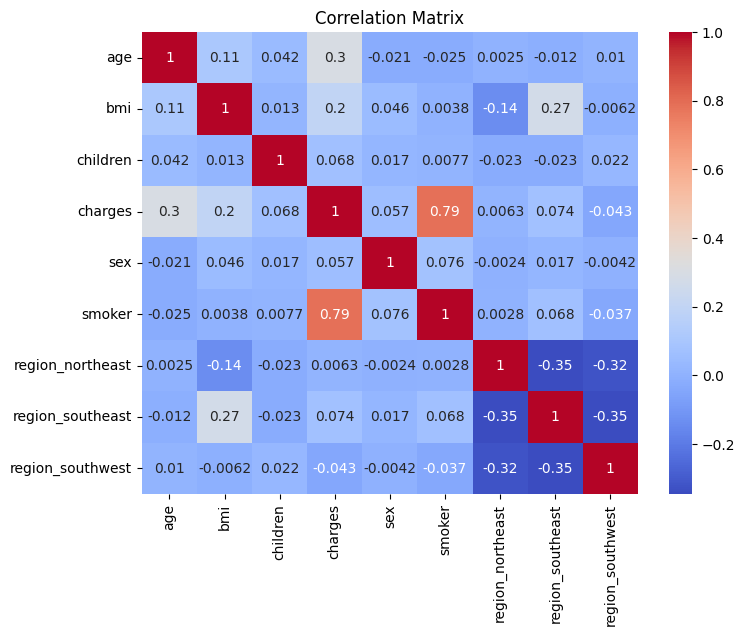

In [12]:
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Observations
- smoker exhibits the strongest positive correlation (approximately 0.79), confirming that smoking status is the most significant predictor of insurance charges.
- age shows a moderate positive correlation (around 0.30), indicating that older individuals tend to have higher charges.
- bmi has a weak positive correlation (around 0.20), suggesting a slight increase in charges with higher BMI.
- children has a very weak correlation (near 0.07), implying minimal impact on charges.
- The sex and region variables (after encoding) show negligible correlations with charges (close to 0), reinforcing that these factors are less influential.

# Train-test split

In [13]:
X = df.drop("charges", axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)

# Standardization

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print( f" MSE: {mse:.2f}, R²: {r2:.2f}")

 MSE: 34543813.62, R²: 0.76


# Polynomial Regression

In [16]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)
model2=LinearRegression()
model2.fit(poly_features_train,y_train)
y_poly_pred = model2.predict(poly_features_test)
mse = mean_squared_error(y_test, y_poly_pred)
r2 = r2_score(y_test, y_poly_pred)
print( f" MSE: {mse:.2f}, R²: {r2:.2f}")

 MSE: 21049918.50, R²: 0.85


<h3> 